 ### Google Stock Price Prediction Using Recurrent Neural Network(RNN)

In [0]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [0]:
# Load Data
df = pd.read_csv('GOOG.csv', parse_dates=True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


### Train and Test Split

We will use the data of 2019 as the test data and rest will be used for training.

In [6]:
train_df = df[df['Date'] <'2019-01-01'].copy()
train_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [7]:
test_df = df[df['Date'] >= '2019-01-01'].copy()
test_df

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3834,2019-11-11,1303.180054,1306.425049,1297.410034,1299.189941,1299.189941,1011900
3835,2019-11-12,1300.000000,1310.000000,1295.770020,1298.800049,1298.800049,1085900
3836,2019-11-13,1294.069946,1304.300049,1293.510010,1298.000000,1298.000000,826700
3837,2019-11-14,1297.500000,1317.000000,1295.650024,1311.459961,1311.459961,1193500


We will drop Date and Adj Close for training the model.

In [8]:
train_set = train_df.drop(['Date','Adj Close'], axis = 1)
train_set.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


#### Scaling the data in the range of 0 and 1

In [9]:
scaler = MinMaxScaler()
train_set = scaler.fit_transform(train_set)
train_set

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

### Preparing Data for the RNN

We will take a 60 days window period for training the RNN. We will train the model with data from previous 60 days stock price and predict the next day price.

In [0]:
# create empty lists to store the input data and the output
X_train = []
y_train = []

In [0]:
for i in range(60, train_set.shape[0]):
  X_train.append(train_set[i-60:i])
  y_train.append(train_set[i,0])

# convert to array
X_train = np.array(X_train)
y_train = np.array(y_train)

In [13]:
X_train.shape,  y_train.shape

((3557, 60, 5), (3557,))

### Building RNN(LSTM) Model

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
# Initiate the model
regressor = Sequential()

# 1st LSTM layer
regressor.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape = (X_train.shape[1],5)))
regressor.add(Dropout(0.2))

# 2nd LSTM layer
regressor.add(LSTM(units=60, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.3))

# 3rd LSTM layer
regressor.add(LSTM(units=80, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.4))

# 4th LSTM layer
regressor.add(LSTM(units=120, activation='tanh'))
regressor.add(Dropout(0.5))

# output layer
regressor.add(Dense(units=1))

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [0]:
# Compiling the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# fit the model
regressor.fit(X_train, y_train, epochs=20, batch_size=32)

Train on 3557 samples
Epoch 1/20
3557/3557 [==============================] - 31s 9ms/sample - loss: 0.0073
Epoch 2/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0033
Epoch 3/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0028
Epoch 4/20
3557/3557 [==============================] - 24s 7ms/sample - loss: 0.0023
Epoch 5/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0027
Epoch 6/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0021
Epoch 7/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0022
Epoch 8/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0019
Epoch 9/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0018
Epoch 10/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0017
Epoch 11/20
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0015
Epoch 12/20
3557/3557 [=======

### Prediction

#### Prepare the test data

For predicting the stock prices of the first observation in the test data we will need the prevoius 60 days stock price, which we will get from the last 60 days of data in the train set.

In [0]:
# getting last 60 days of train data
past_60_days = train_df.tail(60)

In [22]:
# adding the past 60 days data to the test data
test_set = past_60_days.append(test_df, ignore_index=True)
test_set

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-04,1195.329956,1197.510010,1155.576050,1168.189941,1168.189941,2209500
1,2018-10-05,1167.500000,1173.500000,1145.119995,1157.349976,1157.349976,1184300
2,2018-10-08,1150.109985,1168.000000,1127.364014,1148.969971,1148.969971,1932400
3,2018-10-09,1146.150024,1154.349976,1137.572021,1138.819946,1138.819946,1308700
4,2018-10-10,1131.079956,1132.170044,1081.130005,1081.219971,1081.219971,2675700
...,...,...,...,...,...,...,...
277,2019-11-11,1303.180054,1306.425049,1297.410034,1299.189941,1299.189941,1011900
278,2019-11-12,1300.000000,1310.000000,1295.770020,1298.800049,1298.800049,1085900
279,2019-11-13,1294.069946,1304.300049,1293.510010,1298.000000,1298.000000,826700
280,2019-11-14,1297.500000,1317.000000,1295.650024,1311.459961,1311.459961,1193500


In [23]:
test_df.shape, test_set.shape

((222, 7), (282, 7))

We can see now we have 60 more rows in the test set, which are the past 60 days data for the first observation in the test df.

In [24]:
# droping Date and Adj Close column from the test set
test_set = test_set.drop(['Date', 'Adj Close'], axis=1)
test_set.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [26]:
# scaling the data
test_set_scaled = scaler.transform(test_set)
test_set_scaled

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [1.01888518, 1.02486085, 1.03703736, 1.02434941, 0.00992081],
       [1.02169304, 1.03524332, 1.0388189 , 1.03539564, 0.01436506],
       [1.03924388, 1.04986061, 1.05432814, 1.05460763, 0.02150276]])

In [0]:
# Formating the data for the RNN model
X_test = []
y_test = []

for i in range(60, test_set_scaled.shape[0]):
  X_test.append(test_set_scaled[i-60:i])
  y_test.append(test_set_scaled[i,0]) 

In [29]:
# convert to arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

X_test.shape, y_test.shape

((222, 60, 5), (222,))

In [30]:
# make prediction
y_pred = regressor.predict(X_test)
y_pred

array([[0.7927211 ],
       [0.79167736],
       [0.7914306 ],
       [0.7919169 ],
       [0.79322684],
       [0.79540086],
       [0.79835254],
       [0.8017584 ],
       [0.805189  ],
       [0.8082018 ],
       [0.8107145 ],
       [0.8129797 ],
       [0.81520635],
       [0.8176325 ],
       [0.8201203 ],
       [0.8224542 ],
       [0.8244474 ],
       [0.826179  ],
       [0.8275927 ],
       [0.8285741 ],
       [0.8292106 ],
       [0.8299214 ],
       [0.83104604],
       [0.83277285],
       [0.83519655],
       [0.8382097 ],
       [0.8412843 ],
       [0.84395087],
       [0.84600735],
       [0.84758604],
       [0.84897125],
       [0.8503078 ],
       [0.85164684],
       [0.8529341 ],
       [0.8541056 ],
       [0.8549802 ],
       [0.8554857 ],
       [0.855709  ],
       [0.8557303 ],
       [0.8556396 ],
       [0.8555608 ],
       [0.85574263],
       [0.8564373 ],
       [0.8578357 ],
       [0.85998386],
       [0.8626151 ],
       [0.8652944 ],
       [0.867

Since the prediction are in the scaled output, we need to bring them back to the original scale.

In [34]:
# Relative scaling of the features of the data
scaler_scale = scaler.scale_
scaler_scale

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [35]:
# taking the first relative scaling value for transforming the predictions to original scale as the first value corresponds to the first
# column in the data that is the open price
scale_value = 1 / scaler_scale[0]
scale_value

1221.590199

In [0]:
# Transforming the actual and predicted stock prices to the original scale
y_test = y_test * scale_value
y_pred = y_pred* scale_value

In [38]:
y_pred [0:10]

array([[968.3803 ],
       [967.1053 ],
       [966.8039 ],
       [967.39795],
       [968.99817],
       [971.65393],
       [975.25964],
       [979.4202 ],
       [983.611  ],
       [987.2914 ]], dtype=float32)

### Visualizing the Result

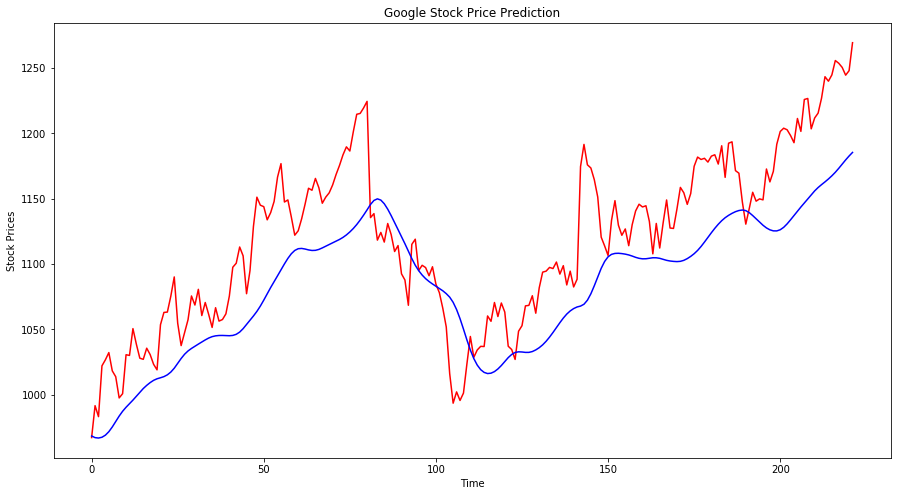

In [40]:
plt.figure(figsize=(15,8))
plt.plot(y_test, color = 'red', label = "Actual Google Stock Price")
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.show()

From the visualization of the result, we can see that although the prediction are not very accurate, the model is able to capture the trend of the stock price. Further tuning of the model cam improve the prediction.

In [46]:
# Evaluation
from sklearn.metrics import mean_squared_error

# Root Mean squared error(RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'The stock price prediction is off by on an average {round(rmse,2)} Dollors')

The stock price prediction is off by on an average 47.52 Dollors
